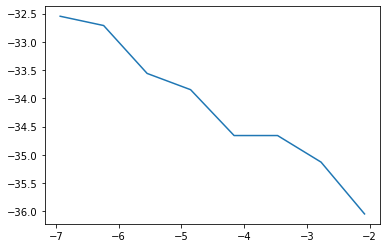

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

yexact = lambda x: 1 -x + x**2 + x**3
f = lambda x: -2 -6*x



ns = [2**i for i in range(3,11)]

def CG(n,b):
    m = len(b)
    bnorm = np.linalg.norm(b,2)
    Aprod = lambda v: (n)**2 *(((v[:-1]-v[1:])**2).sum() + v[0]**2 + v[-1]**2)
    def Amult(v):
        w = np.zeros(len(v))
        w[1:-1] = (n)**2 *(2*v[1:-1]-v[:-2]-v[2:])
        w[0] = (n)**2 *(2*v[0]-v[1])
        w[-1] = (n)**2 *(2*v[-1]-v[-2])
        return w
    x = np.zeros(m)
    r = b
    p = r
    count = 0
    while(count <= n and np.linalg.norm(r,2)/bnorm >= 10**(-10)):
        alpha = np.linalg.norm(r,2)**2/Aprod(p)
        x = x + alpha*p
        r1 = r
        r = r - alpha*Amult(p)
        beta = np.linalg.norm(r,2)**2/np.linalg.norm(r1,2)**2
        p = r + beta*p
        count += 1
    return x


results = []
for N in ns:
    X = np.linspace(0,1,N+1)[1:-1]
    fh = np.array([f(x) for x in X])
    fh[0] += N**2
    fh[-1] += 2*N**2
    yexac = np.array([yexact(x) for x in X])
    CG(N,fh)
    results.append(np.linalg.norm(CG(N,fh)-yexac,np.Inf))
    

plt.plot(np.log([1/n for n in ns]),np.log(results))





